Student name: Dylan Rodrigues

Student id: 24121479

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

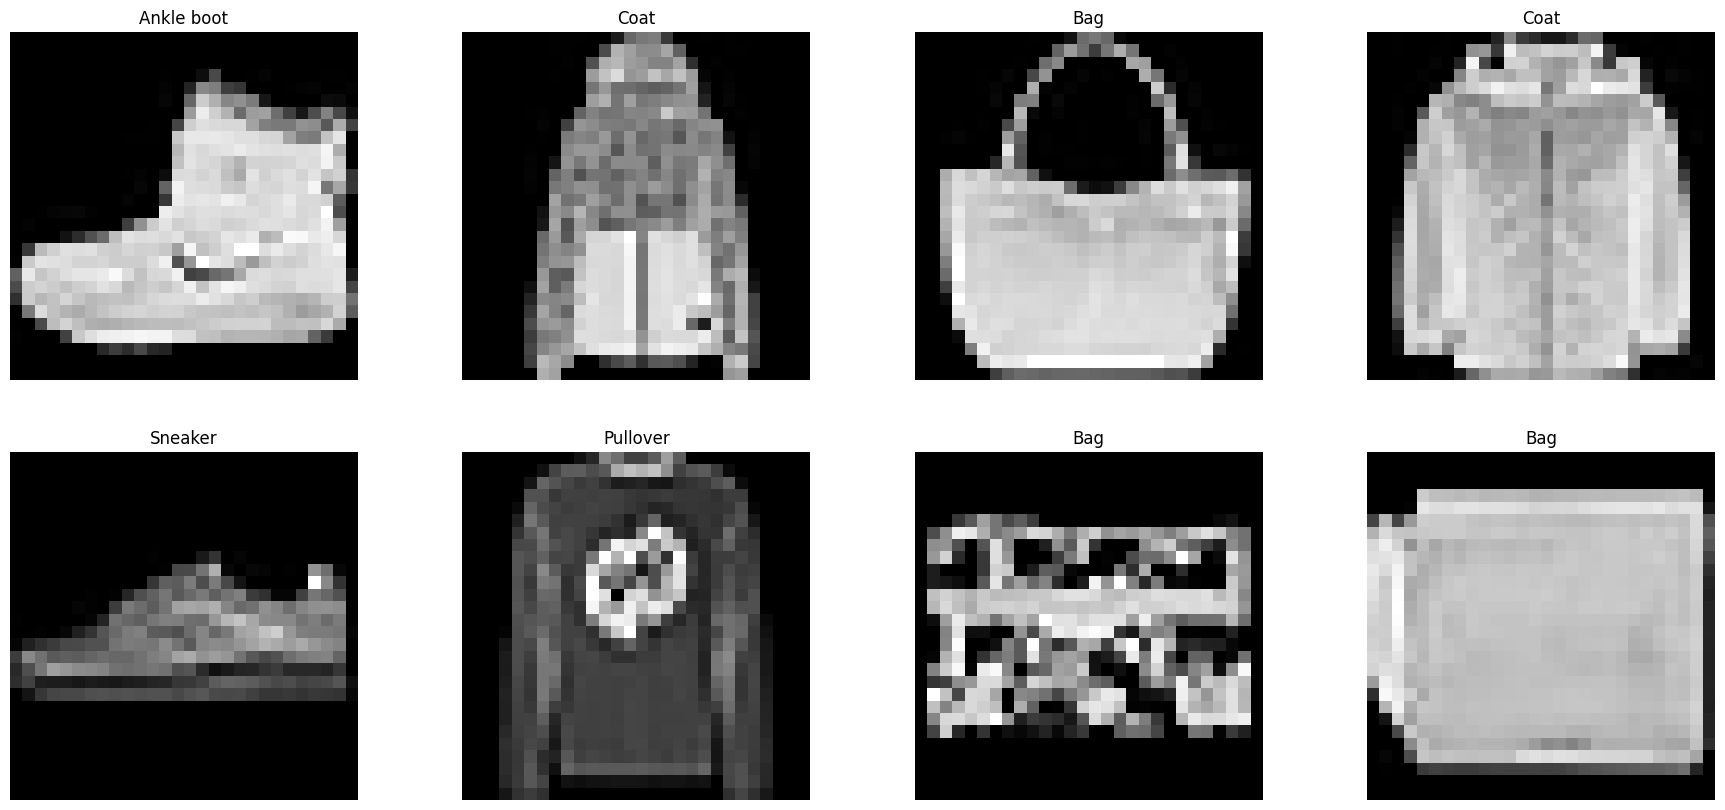

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.linear_model import Perceptron as Perceptron

##################
# Your code here

def train_perceptron(X_train, y_train):
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_train, y_train)
    return perceptron

perceptron = train_perceptron(X_train_scaled, y_train)

In [6]:
from sklearn.metrics import accuracy_score

##################
# Your code here
def evaluate_perceptron(perceptron, X_test, y_test):
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Perceptron Accuracy: {accuracy:.4f}")
    return y_pred

y_pred = evaluate_perceptron(perceptron, X_test_scaled, y_test)

Perceptron Accuracy: 0.8166


<font color='red'>Enter your text here</font>

The accuracy of 81.66% is reasonable but not great, especially for a dataset like Fashion MNIST. While it's above random guessing (which would be 10% for 10 classes), it's relatively low for practical use, as more complex models (like deep neural networks) typically achieve much higher accuracy on this dataset. The Perceptron is limited by its linear decision boundaries, making it less effective for distinguishing complex patterns in image data.

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

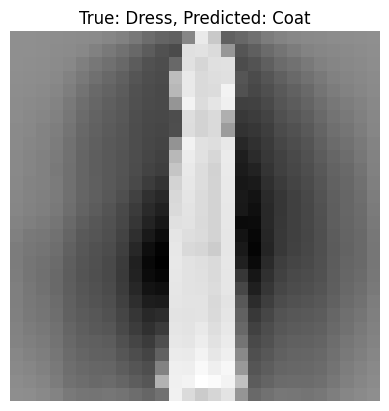

In [9]:
import random

def plot_misclassified_sample(X_test, y_test, y_pred, text_labels):
    misclassified_indices = np.where(y_test != y_pred)[0]
    if len(misclassified_indices) > 0:
        idx = random.choice(misclassified_indices)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f"True: {text_labels[int(y_test[idx])]}, Predicted: {text_labels[int(y_pred[idx])]}")
        plt.show()

plot_misclassified_sample(X_test_scaled, y_test, y_pred, text_labels)

It's understandable that the Perceptron misclassified a "dress" as a "coat" since both items can have similar silhouettes, especially in grayscale images where details like texture and fine differences are harder to distinguish. The model likely struggled due to the overlap in visual features (like shape and length) between these two classes, highlighting the Perceptron's limitations in handling subtle differences in complex, real-world images.

A multiclass perceptron uses a "one-vs-rest" (OvR) approach to handle multiple classes. In this method, a separate perceptron is trained for each class, where each model learns to distinguish one class from all others. During prediction, each perceptron outputs a score, and the class with the highest score is selected as the final prediction. This allows the perceptron to extend its binary classification capability to multiple classes, though it may struggle with overlapping features between classes.

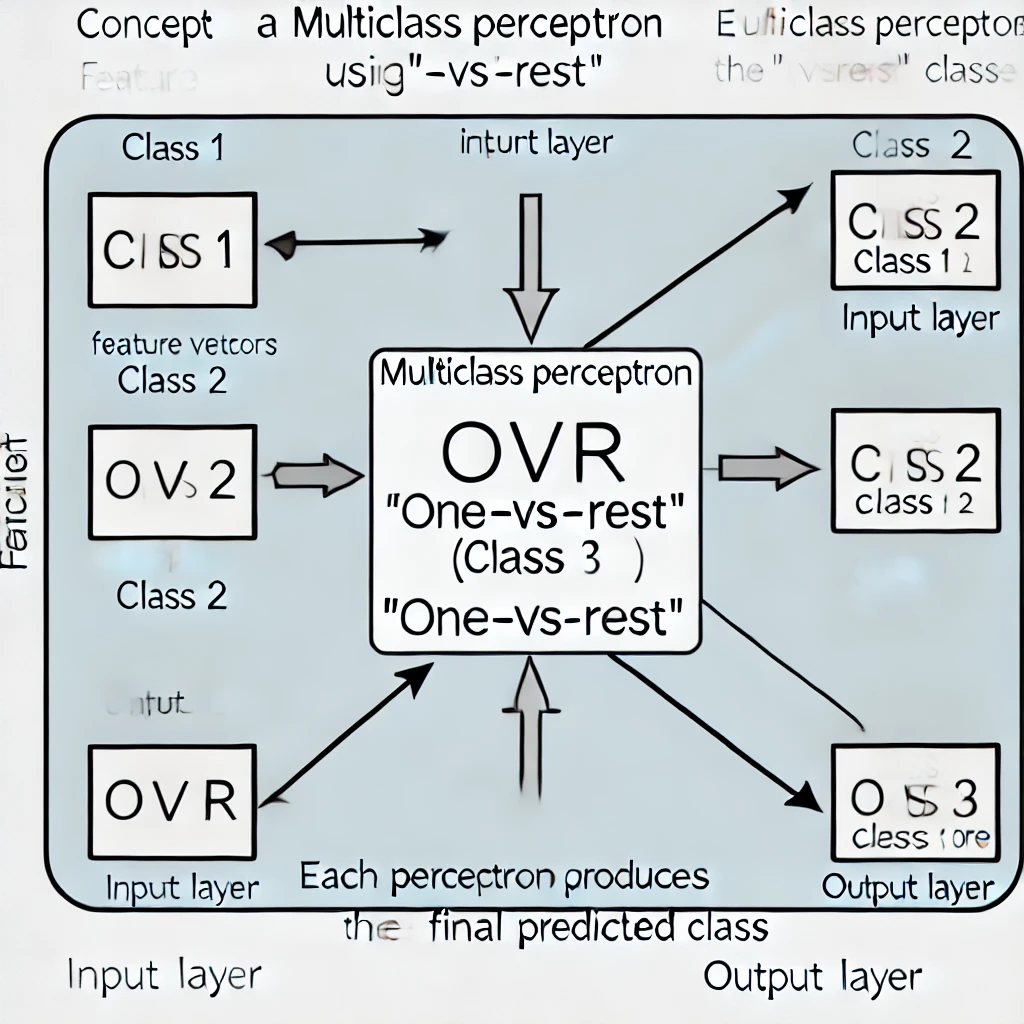

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [10]:
from sklearn.neural_network import MLPClassifier

#######################
# Your code here

mlp = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, verbose=1, random_state=1)
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), random_state=1, verbose=1)

In [11]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here

y_pred_mlp = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy:.4f}")

MLP Accuracy: 0.8698


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>

The size of the input layer is 784 nodes because each image is 28x28 pixels, which flattens to 784 features (28 * 28 = 784).

<br/>

The size of the output layer is 10 nodes, corresponding to the 10 classes in the Fashion MNIST dataset (one for each category: T-shirt/top, Trouser, etc.).


<br/>

The algorithm learns weights for:

  Input layer (784) to hidden layer (20): 784×20=15,680784×20=15,680 weights.
    
  Hidden layer (20) to output layer (10): 20×10=20020×10=200 weights.
    
  Including biases, the total is 15,680+20+200+10=15,91015,680+20+200+10=15,910 weights.

</br>

A difference between training and test accuracy indicates that the model might be overfitting (if training accuracy is much higher) or underfitting (if both accuracies are low). Ideally, the two should be close, suggesting the model generalizes well to unseen data.

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)

for width in widths:
    mlp = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42, verbose=0)
    mlp.fit(X_train_scaled, y_train)

    train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))

    a_train.append(train_accuracy)
    a_test.append(test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


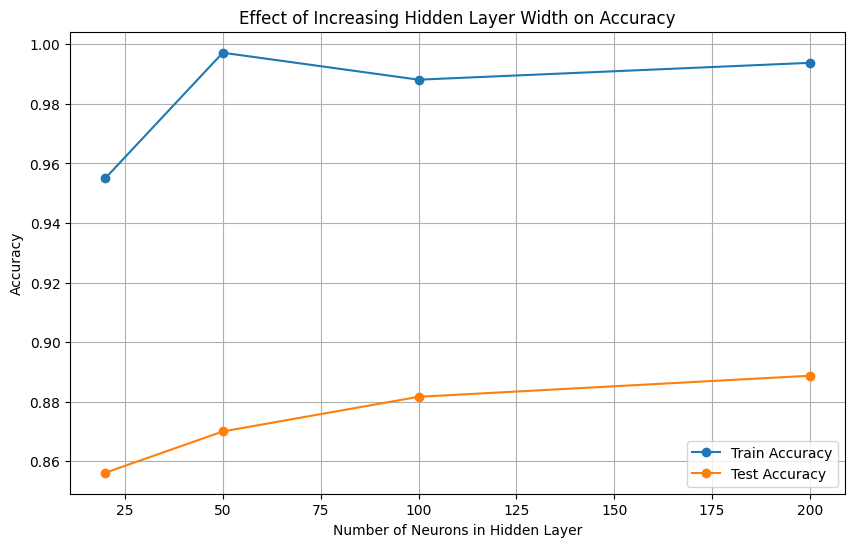

In [13]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here

plt.figure(figsize=(10, 6))
plt.plot(widths, a_train, label='Train Accuracy', marker='o')
plt.plot(widths, a_test, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Effect of Increasing Hidden Layer Width on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

As the width of the hidden layer increased, the training time also increased. The larger the number of neurons, the longer it took to train due to the increase in the number of weights to be learned. Specifically, widths of 100 and 200 neurons took significantly longer compared to 20 and 50 neurons, reflecting the added computational complexity.

<br/>

From the graph, it is evident that increasing the number of neurons in the hidden layer improves both training and test accuracy, but with diminishing returns after a certain point. The best balance between performance and model complexity is achieved with a hidden layer of 50 neurons, which provides a high training accuracy of around 99% and the highest test accuracy at approximately 88%. In terms of model size, this configuration learns a total of 39,760 weights. However, there is a clear indication of overfitting as the training accuracy remains close to 100% while the test accuracy lags behind, especially for wider layers. This gap suggests that the model is learning to fit the training data too closely and struggles to generalize to new, unseen data. To mitigate this, techniques such as increasing regularization (higher alpha value), adding dropout layers, reducing model complexity, or employing early stopping could be effective in improving generalization.


## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [14]:
########################
# Your classifier training code here

layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

for layer_config in layers:
    mlp = MLPClassifier(hidden_layer_sizes=layer_config, alpha=0.001, random_state=42, max_iter=100, early_stopping=True)
    mlp.fit(X_train_scaled, y_train)

    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    a_train.append(train_accuracy)
    a_test.append(test_accuracy)

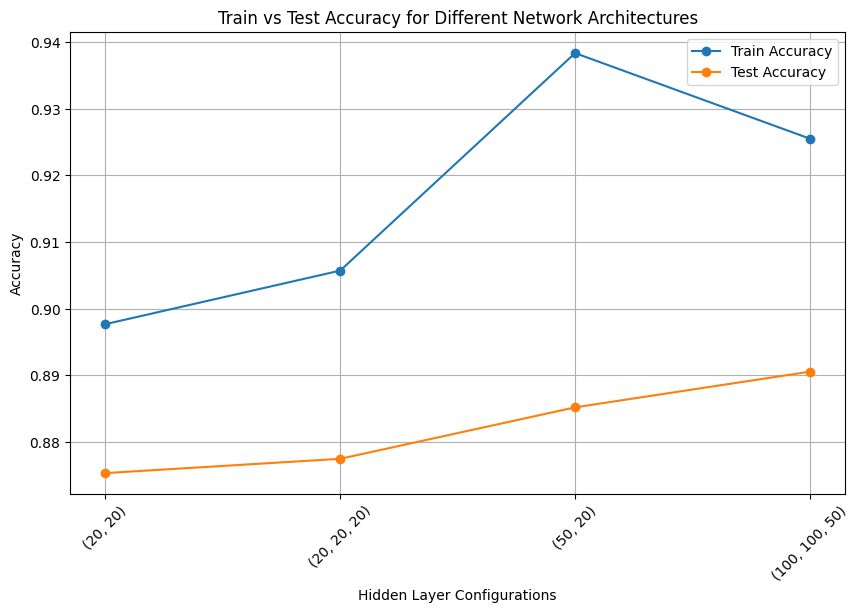

In [15]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here

layer_labels = [str(layer) for layer in layers]

plt.figure(figsize=(10, 6))
plt.plot(layer_labels, a_train, label='Train Accuracy', marker='o')
plt.plot(layer_labels, a_test, label='Test Accuracy', marker='o')
plt.title('Train vs Test Accuracy for Different Network Architectures')
plt.xlabel('Hidden Layer Configurations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

Some calulcations:

Regarding the number of weights we needed to train:

    Input layer (784) to first hidden layer (50): 784×50=39,200784×50=39,200 weights
    First hidden layer (50) to second hidden layer (20): 50×20=1,00050×20=1,000 weights
    Second hidden layer (20) to output layer (10): 20×10=20020×10=200 weights
    Including biases: 39,200+50+1,000+20+200+10=40,48039,200+50+1,000+20+200+10=40,480 weights in total

Answers to both the questions:

The graph suggests that a deeper network with fewer neurons, such as the configuration `(50, 20)`, outperforms a single wide layer with hundreds of neurons in terms of test accuracy. This deeper architecture strikes a better balance between training and test performance, achieving the highest test accuracy while maintaining a strong training accuracy. Interestingly, the `(50, 20)` network achieves this with a significantly lower number of weights compared to a very wide single-layer network.

Specifically, it requires training only about 40,480 weights (from the calculations above), which includes weights and biases across all layers. This result highlights that increasing the depth of the network, rather than just making it wider, can lead to better generalization with fewer parameters, thus reducing the risk of overfitting while still effectively capturing the complexity of the dataset.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

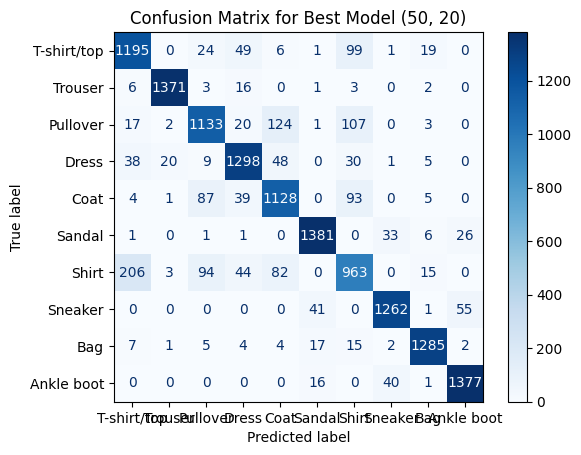

In [16]:
########################
# Your code here

# - using the best model configuration: (50, 20)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
best_mlp = MLPClassifier(hidden_layer_sizes=(50, 20), alpha=0.001, random_state=42, max_iter=100, early_stopping=True)
best_mlp.fit(X_train_scaled, y_train)

y_pred_best = best_mlp.predict(X_test_scaled)

ConfusionMatrixDisplay.from_estimator(best_mlp, X_test_scaled, y_test, display_labels=text_labels, cmap='Blues')
plt.title('Confusion Matrix for Best Model (50, 20)')
plt.grid(False)
plt.show()

<font color='red'>Enter your text here</font>

The confusion matrix shows that the model performs well on most classes, especially for categories like "Trouser", "Sneaker", "Bag", and "Ankle boot", where the diagonal values are high, indicating correct predictions. However, there are some misclassifications, particularly between similar-looking items. For instance, "Shirt" is often confused with "Pullover" and "T-shirt/top". This suggests that the model still kind of struggles to differentiate between classes that have visually similar features.